<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/ChannelFlows/DiskActuator/SingleCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
import pathlib, os
if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" ) 

import mpl_utils as mut
mut.config_plots()

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

mpl.rcParams["figure.figsize"] = (12.5,3) 

<img src="https://raw.githubusercontent.com/joaochenriques/IST_MCTE/main/ChannelFlows/DiskActuator/Figures/sub_domains.svg" width="500px" style="display:inline">

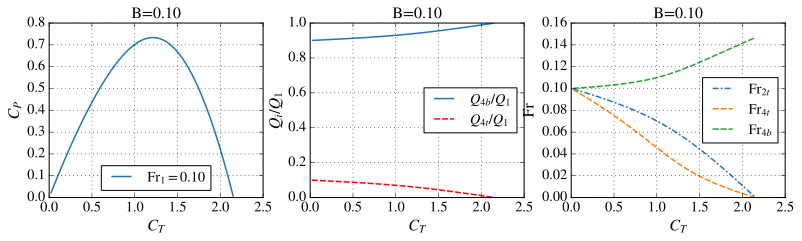

In [3]:
fig, (ax1, ax2, ax3) = mpl.subplots(1,3 )
fig.subplots_adjust( wspace = .22 )

C_T_lst = []
C_P_lst = []
Fr2t_lst = []
Fr4b_lst = []
Fr4t_lst = []

Fr4b_zeta4b_lst = []
Fr4t_zeta4t_lst = []

B = 0.1
Fr1 = 0.1

for Fr4b in np.linspace( Fr1*1.001, Fr1*2.6, 1000 ):

  ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1
  
  C1 = Fr1 - Fr4b*ζ4
  C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
          + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

  Fr4t = ( C1 + np.sqrt(C2) ) / B
  ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
  ζ4b = ζ4 - ζ4t

  Fr2t = Fr4t*ζ4t/B
  C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
  C_P = C_T*Fr2t/Fr1

  if C_P <= 0.0: break

  C_P_lst.append( C_P )
  C_T_lst.append( C_T )

  Fr2t_lst.append( Fr2t )
  Fr4t_lst.append( Fr4t )
  Fr4b_lst.append( Fr4b )

  Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
  Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

ax1.set_title( "B=%.2f" % B )
ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.legend(loc="lower center");
#ax1.set_xticklabels( [] )
ax1.set_xlabel( "$C_T$" )

ax2.set_title( "B=%.2f" % B )
ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1$" )
ax2.plot( C_T_lst, Fr4t_zeta4t_lst, 'r', dashes=(6,2), label="$Q_{4t}/Q_1$" )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend(loc="center right")

ax3.set_title( "B=%.2f" % B )
ax3.plot( C_T_lst, Fr2t_lst, dashes=(6,2,2,2), label="$\mathrm{Fr}_{2t}$" )
ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}$" )
ax3.plot( C_T_lst, Fr4b_lst, dashes=(6,2), label="$\mathrm{Fr}_{4b}$" )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend(loc="center right")
mpl.savefig('ChannelFlowLimits_Ex.pdf', bbox_inches='tight', pad_inches=0.02);

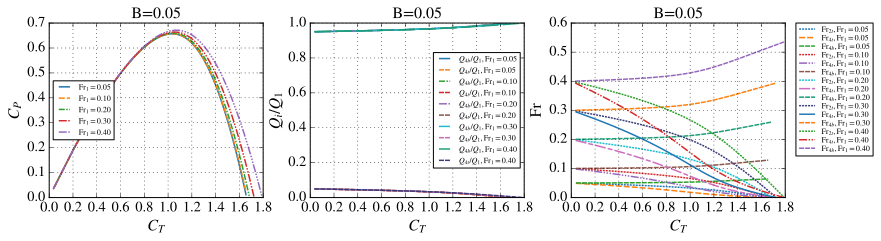

In [4]:
fig, (ax1, ax2, ax3) = mpl.subplots(1,3)
fig.subplots_adjust( wspace = 0.22 )

B = 0.05

for Fr1 in ( 0.05, 0.10, 0.20, 0.3, 0.4 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []

  Fr4b_zeta4b_lst = []
  Fr4t_zeta4t_lst = []
  
  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    C1 = Fr1 - Fr4b*ζ4
    C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

    Fr4t = ( C1 + np.sqrt(C2) ) / B
    ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
    ζ4b = ζ4 - ζ4t
   
    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    if C_P <= 0.0: break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )

    Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
    Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

  ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )

  ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax2.plot( C_T_lst, Fr4t_zeta4t_lst, dashes=(5,1), label="$Q_{4t}/Q_1, \mathrm{Fr}_1=%.2f$" % Fr1 )  

  ax3.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax3.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}, \mathrm{Fr}_1=%.2f$" % Fr1 )

ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.set_title( "B=%.2f" % B );
ax1.set_xlabel( "$C_T$" )
ax1.legend(loc="center left",fontsize=8 )

ax2.set_title( "B=%.2f" % B );
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend(loc="center right",fontsize=8 )

ax3.set_title( "B=%.2f" % B )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=8, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 )
mpl.savefig('Sensitivity_B%4.2f.pdf' % B, bbox_inches='tight', pad_inches=0.02);

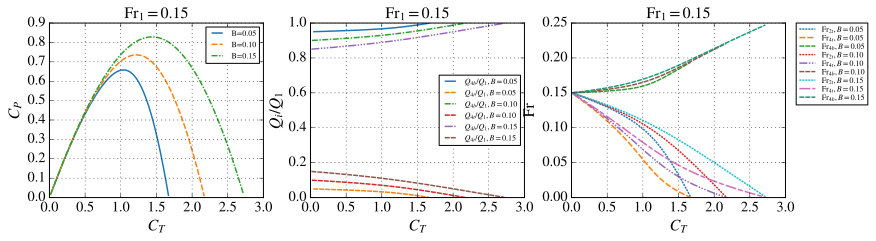

In [5]:
fig, (ax1, ax2, ax3) = mpl.subplots(1,3)
fig.subplots_adjust( wspace = 0.22 )

Fr1 = 0.15

for B in ( 0.05, 0.10, 0.15 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []

  Fr4b_zeta4b_lst = []
  Fr4t_zeta4t_lst = []

  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    C1 = Fr1 - Fr4b*ζ4
    C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

    Fr4t = ( C1 + np.sqrt(C2) ) / B
    ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
    ζ4b = ζ4 - ζ4t

    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    if C_P <= 0.0: break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )

    Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
    Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

  ax1.plot( C_T_lst, C_P_lst, label="B=%.2f" % B )

  ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1, B=%.2f$" % B )
  ax2.plot( C_T_lst, Fr4t_zeta4t_lst, dashes=(5,1), label="$Q_{4t}/Q_1, B=%.2f$" % B )   

  ax3.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}, B=%.2f$" % B )
  ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}, B=%.2f$" % B )
  ax3.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}, B=%.2f$" % B )

ax1.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.set_xlabel( "$C_T$" )
ax1.grid()
ax1.legend(loc="upper right",fontsize=8 )

ax2.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend(loc="center right",fontsize=8 )

ax3.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=8, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 )
mpl.savefig('Sensitivity_Fr%4.2f.pdf' % Fr1, bbox_inches='tight', pad_inches=0.02);

In [6]:
def CardanoRoots( aa, bb ):
  # Cardano algorithm to solve our polynomial, see:
  # https://www.shsu.edu/kws006/professional/Concepts_files/SolvingCubics.pdf
  P = -2.0*aa
  Q = -2.0*bb
  Δ = (P/3.0)**3 + (Q/2)**2
  if Δ < 0.0: Δ = Δ + 0J
  β = ( -Q/2.0 - np.sqrt(Δ) )**(1.0/3.0)
  α = P/(3.0*β)
  ω = ( -1.0 + np.sqrt(3.0)*1J) / 2.0
  
  x1 = α - β
  x2 = (α*ω - β)*ω
  x3 = (α - β*ω)*ω

  if np.imag(x1) < 1E-15: x1 = np.real( x1 )
  if np.imag(x2) < 1E-15: x2 = np.real( x2 )
  if np.imag(x3) < 1E-15: x3 = np.real( x3 )

  # applies only for this solution 
  assert( np.imag( x1 ) == 0 )
  assert( np.imag( x2 ) == 0 )
  assert( np.imag( x3 ) == 0 )
  assert( x1 <= 0.0 )
  assert( x2 <= x3 )

  return (x2, x3)

In [7]:
Fr1 = 0.3
Fr4b = Fr1*1.5
B = 0.6

ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

C1 = Fr1 - Fr4b*ζ4
C2 = B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
        + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2

Fr4t = ( C1 + np.sqrt(C2) ) / B
ζ4t = ( Fr4b*ζ4 - Fr1 ) / ( Fr4b - Fr4t )
ζ4b = ζ4 - ζ4t

Fr2t = Fr4t*ζ4t/B
C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
C_P = C_T*Fr2t/Fr1

mb = Fr4b*ζ4b + Fr4t*ζ4t
bb = mb**2
aa = (Fr4b**2*ζ4b + Fr4t**2*ζ4t + 1/2*ζ4**2)

ζs = CardanoRoots( aa, bb )
ζ5 = ζs[1]
Fr5 = mb / ζ5

ζ4, ζ5, Fr5

(0.94375, 0.953108697734451, 0.31475948201197096)

In [9]:
Fr5**3*ζ5/2 - (Fr4b**3*ζ4b/2 + Fr4t**3*ζ4t/2)

-0.004353709075616699

In [10]:
 Fr5**3*ζ5/2 - Fr1**3/2

0.0013610297274666405